In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import pathlib

In [11]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/Users/shouta_shimizu/.keras/datasets/auto-mpg.data'

In [12]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [13]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [14]:
dataset.dropna(inplace=True)

In [15]:
dataset['Origin'] = dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

In [16]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [18]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

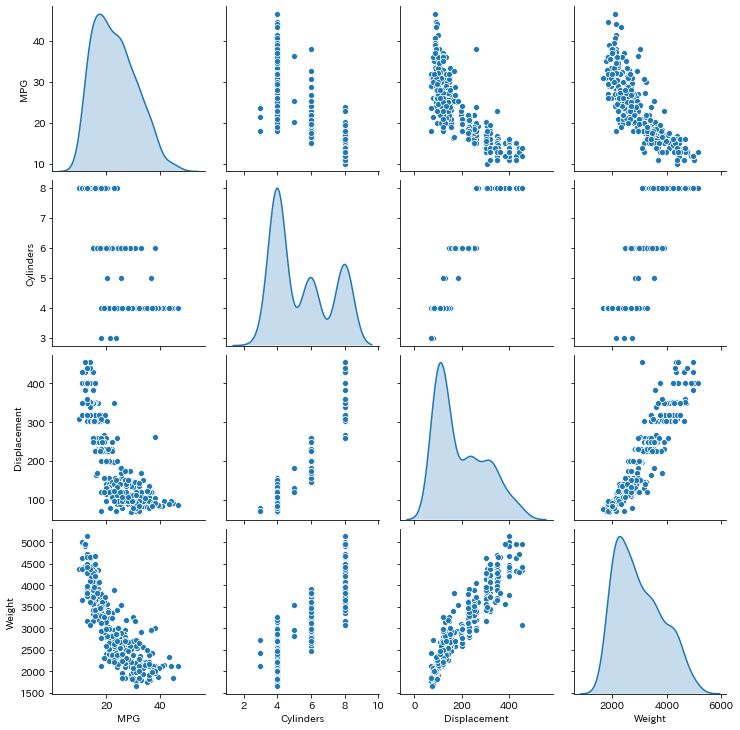

In [19]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [20]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")

count    314.000000
mean      23.310510
std        7.728652
min       10.000000
25%       17.000000
50%       22.000000
75%       28.950000
max       46.600000
Name: MPG, dtype: float64

In [21]:
train_stats = train_stats.transpose()

In [22]:
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [ ]:
train_lables = train_dataset.pop('MPG')

In [26]:
test_lables = test_dataset.pop('MPG')

In [27]:
def norm(x):
    return (x-train_stats['mean'])/train_stats['std']

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [31]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
normed_train_data = scaler.fit_transform(train_dataset)
normed_test_data = scaler.transform(test_dataset)

In [38]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    
    return model

In [39]:
model = build_model()

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [43]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.25843573],
       [ 0.10905927],
       [-0.00175872],
       [-0.11115406],
       [ 0.29712164],
       [-0.12440915],
       [ 0.3251114 ],
       [ 0.7062262 ],
       [-0.16886774],
       [ 0.59082985]], dtype=float32)

In [44]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [45]:
EPOCHS = 1000
history = model.fit(normed_train_data, train_lables, epochs=EPOCHS, validation_split=0.2, verbose=0, 
                   callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:558.3275,  mae:22.3677,  mse:558.3275,  val_loss:546.0987,  val_mae:22.0514,  val_mse:546.0987,  
....................................................................................................
Epoch: 100, loss:6.1417,  mae:1.7245,  mse:6.1417,  val_loss:8.1613,  val_mae:2.1956,  val_mse:8.1613,  
....................................................................................................
Epoch: 200, loss:5.6574,  mae:1.6767,  mse:5.6574,  val_loss:8.2985,  val_mae:2.2067,  val_mse:8.2985,  
....................................................................................................
Epoch: 300, loss:4.9457,  mae:1.5376,  mse:4.9457,  val_loss:8.1599,  val_mae:2.1722,  val_mse:8.1599,  
....................................................................................................
Epoch: 400, loss:4.4462,  mae:1.4327,  mse:4.4462,  val_loss:8.0644,  val_mae:2.1672,  val_mse:8.0644,  
..............................................................

In [46]:
hist = pd.DataFrame(history.history)

In [47]:
hist['epoch'] = history.epoch

In [48]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.372065,1.053713,2.372066,9.066128,2.363342,9.066128,995
996,2.363896,0.995415,2.363895,8.919135,2.248134,8.919135,996
997,2.469401,1.080178,2.469401,8.735897,2.290156,8.735896,997
998,2.378074,1.027813,2.378075,9.465716,2.390864,9.465715,998
999,2.440983,1.074616,2.440983,9.041900,2.350277,9.041900,999


In [49]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

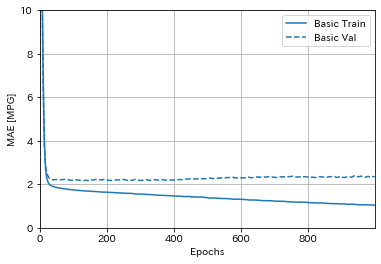

In [50]:
plotter.plot({'Basic': history}, metric='mae')
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

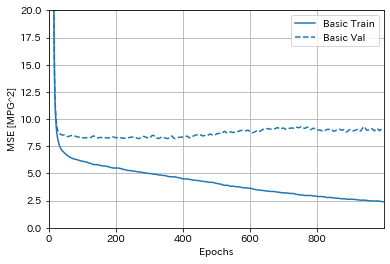

In [51]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [52]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_lables, epochs=EPOCHS, validation_split=0.2, verbose=0, 
                          callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:550.1335,  mae:22.0063,  mse:550.1335,  val_loss:535.9279,  val_mae:21.5516,  val_mse:535.9280,  
.............................................................

Text(0, 0.5, 'MAE [MPG]')

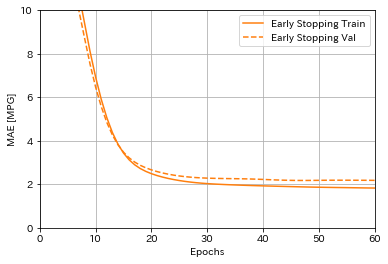

In [54]:
plotter.plot({'Early Stopping': early_history}, metric='mae')
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [55]:
loss, mae, mse = model.evaluate(normed_test_data, test_lables, verbose=2)

78/78 - 0s - loss: 5.6567 - mae: 1.9065 - mse: 5.6567


Text(0, 0.5, 'Predictions[MPG]')

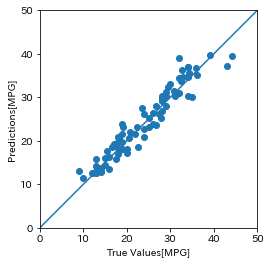

In [60]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_lables, test_predictions)
lims = [0, 50]
plt.plot(lims, lims)
plt.xlim(lims)
plt.ylim(lims)
plt.xlabel('True Values[MPG]')
plt.ylabel('Predictions[MPG]')

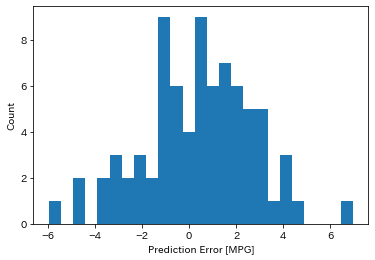

In [64]:
error = test_predictions - test_lables
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count');